# Problem Analysis Workshop 3


## Group4 Members

* Shyam Akhil Nekkanti - 8982123
* Jun He (Helena) - 8903073
* Zheming Li (Brendan) - 8914152

### About Dataset
UPDATE: Source code used for collecting this data released here

Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of this dataset.

Content
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

EDIT: Now includes data from RU, MX, KR, JP and IN regions (Russia, Mexico, South Korea, Japan and India respectively) over the same time period.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.

Acknowledgements
This dataset was collected using the YouTube API.

Inspiration
Possible uses for this dataset could include:

Sentiment analysis in a variety of forms
Categorising YouTube videos based on their comments and statistics.
Training ML algorithms like RNNs to generate their own YouTube comments.
Analysing what factors affect how popular a YouTube video will be.
Statistical analysis over time.

### Clustering Application
Clustering can group YouTube videos based on features like views, likes, and comments. This helps identify patterns and trends, such as popular content categories or user engagement levels.


## Dataset

### [Trending YouTube Video Statistics](https://www.kaggle.com/datasets/datasnaek/youtube-new)

* CSV
* Contains data for multiple regions including US, GB, DE, CA, FR, RU, MX, KR, JP and IN.
* Includes Various metrics such as views, likes, dislikes, comment count, and more.

## Data Processing （Refine the data source）


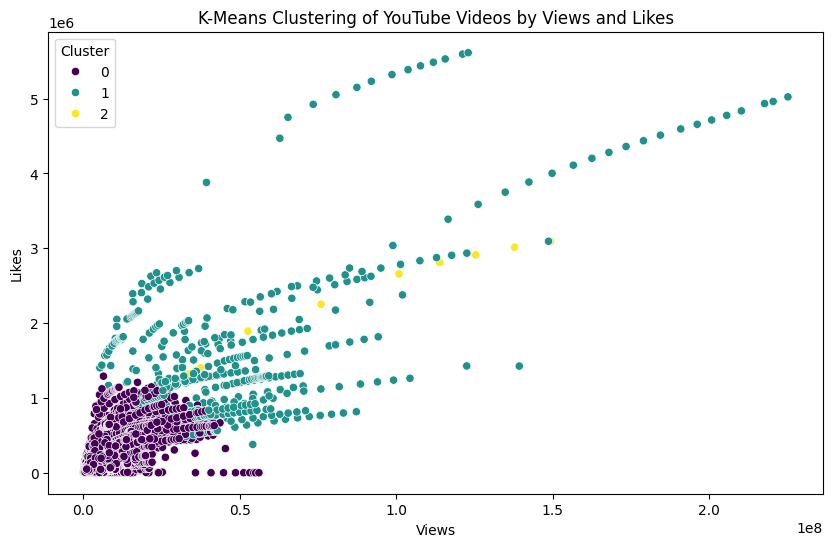

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "youtube-dataset/USvideos.csv"  # Replace with actual path
df = pd.read_csv(url)

# Select numerical features for clustering, dropping NaN values
df = df[['views', 'likes', 'dislikes', 'comment_count']].dropna()

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means with a chosen number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['views'], y=df['likes'], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clustering of YouTube Videos by Views and Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.legend(title="Cluster")
plt.show()


### Conclusion
Means algorithm grouped videos into clusters based on views and likes, showing segments such as highly popular videos (high views and likes), average-engagement videos, and low-engagement videos. This segmentation allows for insights into different content tiers and potential engagement strategies for each group.